In [219]:
from sklearn import datasets, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [220]:
import pandas as pd
df = pd.read_csv("../data/전처리데이터/성동구 최종 데이터.csv", encoding='cp949')

In [221]:
from sklearn.model_selection import train_test_split
#학습 데이터, 레이블(label) 분리
X = df[['버스 수','버스 총 승차수','평균 배차 간격','지하철역 최단거리(m)','도로폭_숫자','18세 이상']]
y = df["쉼터여부"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [222]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (302, 6) (302,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (548, 6) (548,)
SMOTE 적용 후 레이블 값 분포: 
 0    274
1    274
Name: 쉼터여부, dtype: int64


In [223]:
def cross_validation(classifier, features, labels):
  cv_scores = []
  for i in range(10):
    scores = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
  return cv_scores

dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), X_train_over, y_train_over) #의사결정 트리의 정확도
print(dt_cv_scores)
rf_cv_scores = cross_validation(RandomForestClassifier(), X_train_over, y_train_over) #랜덤 포레스트의 정확도
print(rf_cv_scores)

[0.9052188552188551, 0.9143771043771045, 0.9088552188552187, 0.9143434343434343, 0.9088552188552189, 0.9125589225589226, 0.9088888888888889, 0.9088552188552187, 0.9125252525252525, 0.9051851851851851]
[0.9380808080808081, 0.9362962962962964, 0.9271380471380473, 0.9344781144781142, 0.9344444444444445, 0.9325925925925928, 0.9362289562289563, 0.9289562289562289, 0.9325925925925928, 0.9308080808080808]


<AxesSubplot:>

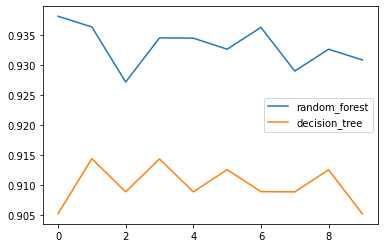

In [224]:
cv_list = [
           ['random_forest', rf_cv_scores],
           ['decision_tree', dt_cv_scores]
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [225]:
#의사결정 트리의 정확도
print(np.mean(dt_cv_scores))
#랜덤 포레스트의 정확도
print(np.mean(rf_cv_scores))

0.90996632996633
0.9331616161616163


In [235]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train_over, y_train_over)

RandomForestClassifier(n_estimators=10000)

In [236]:
pred = clf.predict(X_test)
print("accuracy :", str(accuracy_score(y_test, pred)))

accuracy : 0.8923076923076924


In [237]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       113
           1       0.58      0.65      0.61        17

    accuracy                           0.89       130
   macro avg       0.76      0.79      0.77       130
weighted avg       0.90      0.89      0.89       130



In [229]:
importances = clf.feature_importances_
importances

array([0.20261985, 0.42129096, 0.11928189, 0.1063642 , 0.0680525 ,
       0.08239059])

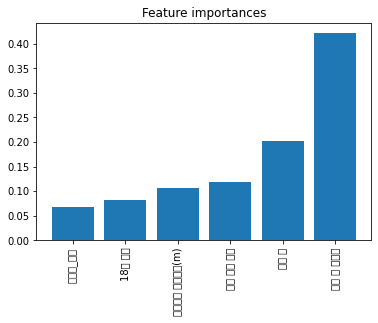

In [230]:
#피쳐 중요도
indices_sorted = np.argsort(importances)

plt.figure()
plt.title('Feature importances')
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()

In [231]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('f1 score :', f1)

f1 score : 0.6666666666666667
